In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
df = pd.read_csv("C:\\Users\\Hp\\Desktop\\python-kickstart\\FuelConsumptionCo2.csv")
df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
705,2014,MAZDA,MAZDA3 4-DOOR,COMPACT,2.5,4,AS6,X,8.4,6.1,7.4,38,170
676,2014,LEXUS,RX 450h AWD,SUV - SMALL,3.5,6,AV6,Z,7.9,8.6,8.2,34,189
696,2014,MAZDA,CX-5,SUV - SMALL,2.5,4,AS6,X,9.6,7.4,8.6,33,198
247,2014,CHEVROLET,SONIC,COMPACT,1.4,4,AS6,X,9.1,6.7,8.0,35,184
899,2014,PORSCHE,CAYMAN S,TWO-SEATER,3.4,6,AM7,Z,11.3,7.9,9.8,29,225


In [10]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [12]:
df = df.drop(['MODELYEAR','MAKE','MODEL','VEHICLECLASS','TRANSMISSION','FUELTYPE',],axis=1)

In [14]:
df.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


In [16]:
 df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB',],axis=1)

In [18]:
df.head(9)

,ENGINESIZE,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,33,196
1,2.4,29,221
2,1.5,48,136
3,3.5,25,255
4,3.5,27,244
5,3.5,28,230
6,3.5,28,232
7,3.7,25,255
8,3.7,24,267


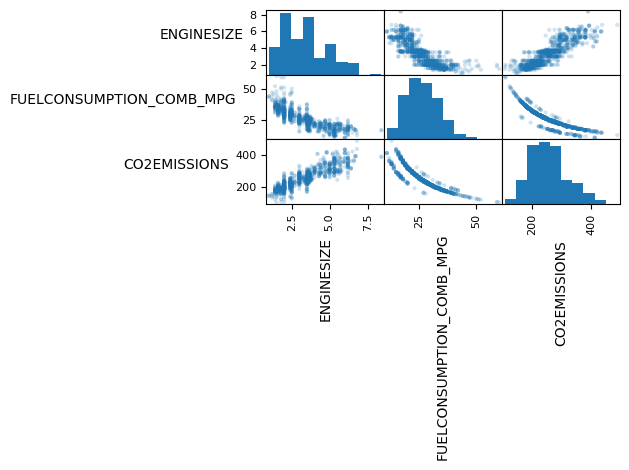

In [20]:
axes = pd.plotting.scatter_matrix(df,alpha=0.2)

for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')


plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [22]:
X = df.iloc[:,[0,1]].to_numpy()
y = df.iloc[:,[2]].to_numpy()

In [24]:
from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

In [26]:
pd.DataFrame(X_std).describe().round(2)

,0,1
count,1067.00,1067.00
mean,0.00,-0.00
std,1.00,1.00
min,-1.66,-2.07
25%,-0.95,-0.73
50%,0.04,-0.06
75%,0.67,0.61
max,3.57,4.50


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_std,y,test_size=0.2,random_state=42)

In [32]:
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train,y_train)

coef_ = regressor.coef_
intercept_=regressor.intercept_

print('Coefficient: ',coef_)
print('Intercept: ',intercept_)

Coefficient:  [[ 25.27339614 -37.4381472 ]]
Intercept:  [256.29072488]


In [38]:
means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

coef_original = coef_/ std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print('Coefficients: ',coef_original)
print('Intercept: ',intercept_original)

Coefficients:  [[17.8581369  -5.01502179]]
Intercept:  [329.1363967]


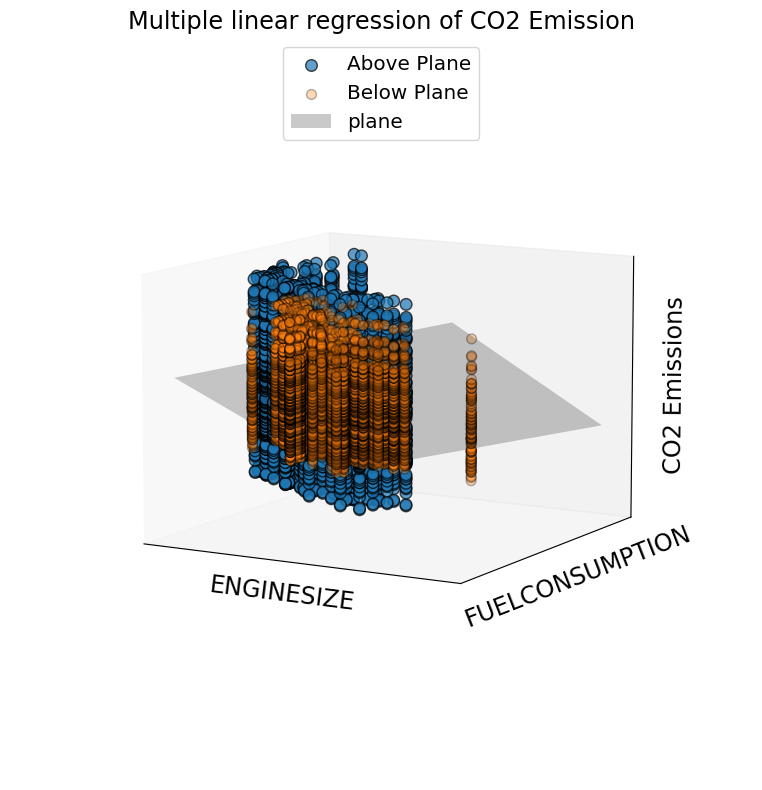

In [52]:
import numpy as np
import matplotlib.pyplot as plt

X1 = X_test[:,0] if X_test.ndim > 1 else X_test
X2 = X_test[:,1] if X_test.ndim > 1 else np.zeros_like(X1)

x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100),
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ + coef_[0,0] * x1_surf + coef_[0,1] * x2_surf

y_pred = regressor.predict(X_test.reshape(-1,1)) if X_test.ndim == 1 else regressor.predict(X_test)
above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:,0]
below_plane = below_plane[:,0]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane], label="Above Plane", s=70, alpha=.7, ec='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane], label="Below Plane", s=50, alpha=.3, ec='k')

ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21, label='plane')

ax.view_init(elev=10)

ax.legend(fontsize='x-large', loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')  # Changed to set_zlabel for the z-axis
ax.set_title('Multiple linear regression of CO2 Emission', fontsize='xx-large')
plt.tight_layout()
plt.show()

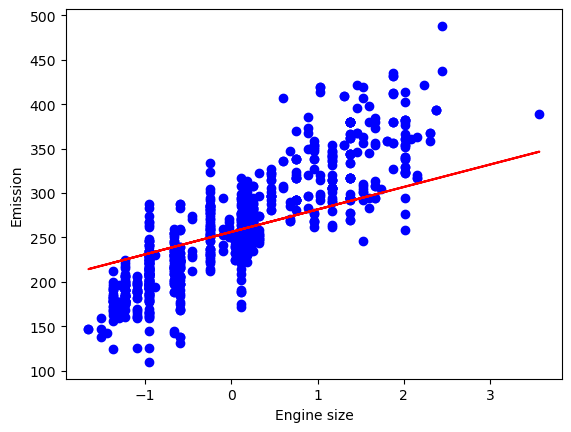

In [54]:
plt.scatter(X_train[:,0],y_train,color='blue')
plt.plot(X_train[:,0],coef_[0,0] * X_train[:,0] + intercept_[0],'-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

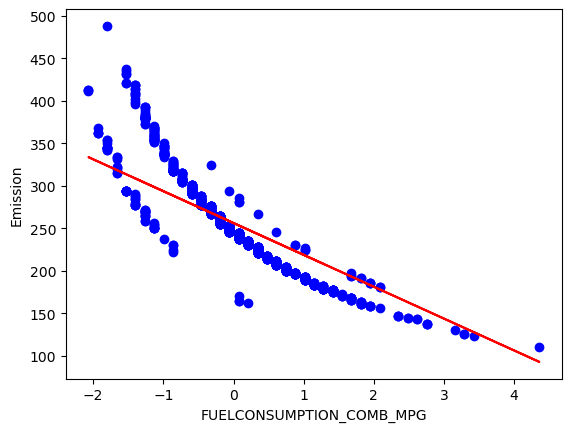

In [56]:
plt.scatter(X_train[:,1],y_train,color='blue')
plt.plot(X_train[:,1],coef_[0,1] * X_train[:,1] + intercept_[0],'-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()

In [58]:
### Exercise 1
### Determine and print the parameters for the best-fit linear regression line for CO2 emission with respect to engine size.

X_train_1 = X_train[:,0]

regressor_1 = linear_model.LinearRegression()
regressor_1.fit(X_train_1.reshape(-1,1),y_train)
coef_1 = regressor_1.coef_
intercept_1 = regressor_1.intercept_
print ('Coefficients: ',coef_1)
print ('Intercept: ',intercept_1)

Coefficients:  [[55.18408797]]
Intercept:  [256.77183014]


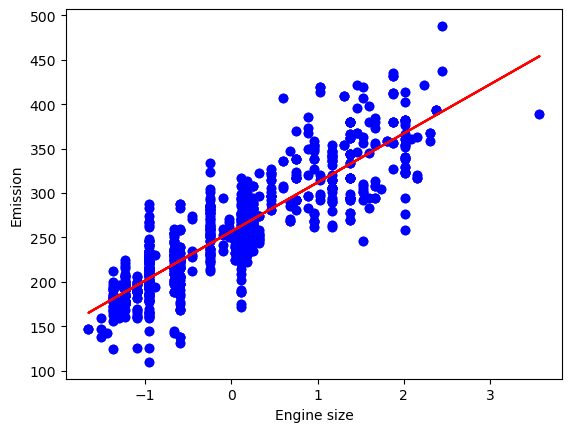

In [62]:
### Exercise 2
### Produce a scatterplot of CO2 emission against ENGINESIZE and include the best-fit regression line to the training data.  

plt.scatter(X_train_1,y_train,color='blue')
plt.plot(X_train_1,coef_1[0] * X_train_1 + intercept_1,'r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


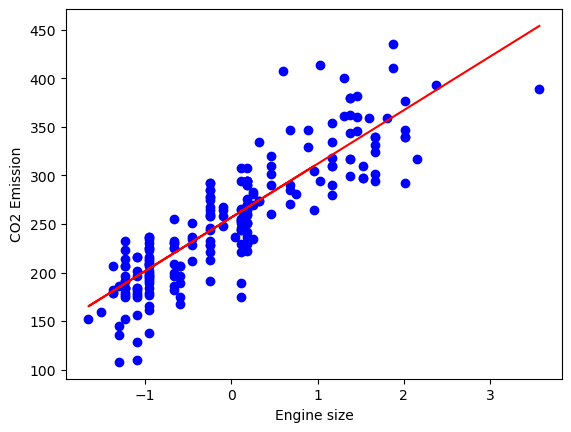

In [66]:
### Exercise 3
##Generate the same scatterplot and best-fit regression line, but now base the result on the test data set. 
##Consider how the test result compares to the training result.
X_test_1 = X_test[:,0]

plt.scatter(X_test_1,y_test,color='blue')
plt.plot(X_test_1,coef_1[0] * X_test_1 + intercept_1,'r')
plt.xlabel("Engine size")
plt.ylabel("CO2 Emission")
plt.show()


In [68]:
### Exercise 4
### Repeat the same modeling but use FUELCONSUMPTION_COMB_MPG as the independent variable instead. Display the model coefficients including the intercept.

X_train_2 = X_train[:,1]

regressor_2 = linear_model.LinearRegression()
regressor_2.fit(X_train_2.reshape(-1,1),y_train)
coef_2 = regressor_2.coef_
intercept_2 = regressor_2.intercept_
print ('Coefficients: ',coef_2)
print ('Intercept: ',intercept_2)

Coefficients:  [[-58.51827989]]
Intercept:  [256.09392179]


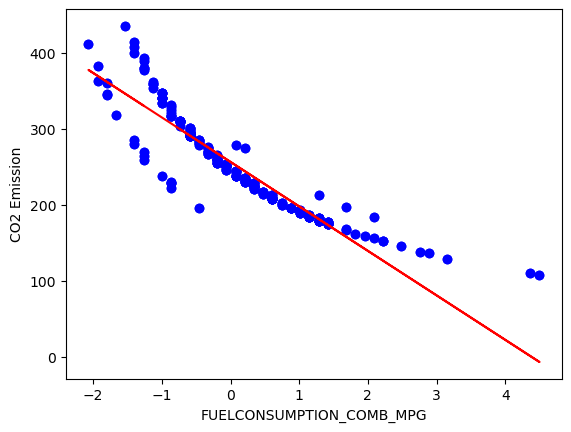

In [74]:
### Exercise 5
##Generate a scatter plot showing the results as before on the test data.
##Consider  well the model fits, and what you might be able to do to improve it. We'll revisit this later in the course.

X_test_2 = X_test[:,1]

plt.scatter(X_test_2,y_test,color='blue')
plt.plot(X_test_2,coef_2[0] * X_test_2 + intercept_2,'r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("CO2 Emission")
plt.show()
